# XGBoost ---- eXtreme Gradient Boosting

It is a powerful and efficient machine learning algorithm that implements gradient boosting. It's known for its speed, scalability, and high performance in various machine learning tasks, including classification, regression, and ranking. XGBoost uses a parallel tree boosting technique and is designed to handle large datasets effectively.

RMSE: 0.4767
R2 Score: 0.8266


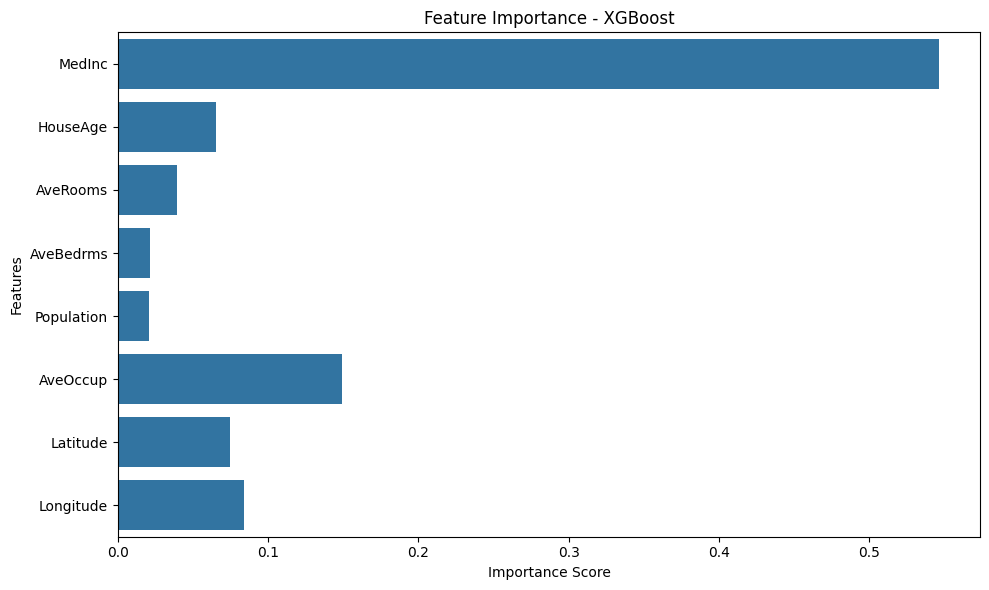

['scaler.pkl']

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor

# 1. Load the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train XGBoost Regressor

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)


# objective='reg:squarederror'
# Uses the squared error (mean squared error) loss for regression.

# n_estimators=100
# Builds 100 boosting trees.

# learning_rate=0.1
# Shrinks the contribution of each tree for smoother learning.

# random_state=42
# Ensures reproducibility of results.

xgb_model.fit(X_train_scaled, y_train)

# 5. Predictions
y_pred = xgb_model.predict(X_test_scaled)

# 6. Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# 7. Feature Importance Plot
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

import joblib

# Save the trained model
joblib.dump(xgb_model, "xgb_model.pkl")

# Save the scaler too, for use during prediction
joblib.dump(scaler, "scaler.pkl")



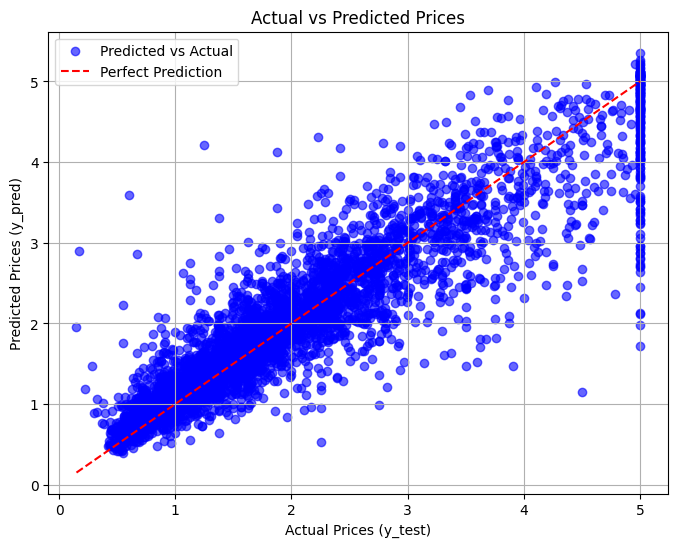

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install xgboost